In [13]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import json

from sklearn.metrics import f1_score

## allow the import of the MovieData class
import sys
import os
path = os.path.abspath(os.getcwd()) + '/../data_load'
sys.path.insert(0, path)

from movie_data import MovieData

%matplotlib inline

In [18]:
moviedata = MovieData(min_genre_frequency=0.05)
print(moviedata.genre_labels)

['Action' 'Adventure' 'Comedy' 'Crime' 'Drama' 'Romance' 'Thriller']


In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.7, 
    analyzer='word',
    ngram_range=(1, 1),
    max_features=10000,
    stop_words='english')

X = vectorizer.fit_transform(moviedata.plots)
# vectorizer.get_feature_names()

In [63]:
X.todense()

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
XX = pca.fit_transform(X.todense())

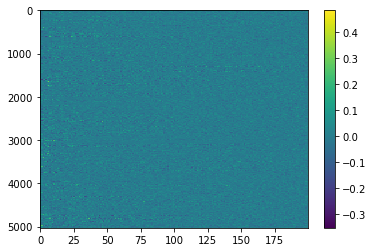

In [82]:
plt.imshow(XX, aspect='auto')
plt.colorbar()

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    XX, 
    moviedata.one_hot_genres, 
    test_size=0.4, 
    random_state=42
)

In [84]:
XX.shape

(5029, 200)

In [87]:
genre_coeffs = []
scores = []

for i, label in enumerate(moviedata.genre_labels):
    coeffs = np.linalg.lstsq(X_train, y_train[:, i])[0]
    genre_coeffs.append(coeffs)
    y_pred = np.dot(X_test, coeffs)
    y_pred = np.array(y_pred > 0.25, dtype=int)
    score = f1_score(y_test[:, i], y_pred)
    scores.append(score)
    print("Genre: {}, Score: {:.2f}".format(label, score))

Genre: Action, Score: 0.57
Genre: Adventure, Score: 0.52
Genre: Comedy, Score: 0.46
Genre: Crime, Score: 0.55
Genre: Drama, Score: 0.39
Genre: Romance, Score: 0.48
Genre: Thriller, Score: 0.31


In [86]:
np.mean(scores)

0.46895499579944522